Stochastic Gradient Descent algorith is a linear alogrithm used for regression and classification. As the name suggests this is a linear algorithm based on the princilpe of Gradient Descent. Furthermore, this algorithm trains its model taking random instances from our dataset rather than using the entire dataset so it got its name Stochastic Gradient Descent. 

In this notebook we are using this algorithm in 2 time domain features (RMS,IAV) and 2 frequency domain features (Zero crossing rate and spectral slope) to build a classifier and check its performance. We shall be using features from all the channels.

Lets start by importing all the libraries required for this notebook.

In [ ]:
#importing libraries
import pandas as pd #for handling data
import numpy as np #for handling data matrix
import matplotlib.pyplot as plt #for plotting
import matplotlib #for plotting
from sklearn.preprocessing import StandardScaler #for scaling features
from sklearn.model_selection import train_test_split #for creating train and test sets
from sklearn.linear_model import SGDClassifier #classifier 
from sklearn.metrics import precision_score, recall_score, confusion_matrix #evaluation measures
from sklearn.decomposition import PCA #for Principle Component Analysis of the features set

As this notebook was made using Google Colabration, the features csv has to be read from the google drive with the configurations below:

In [ ]:
#downloading and reading the features csv from the google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1spjlxMKsa5thVk8ev3HY1GV4HX2qP4P-'})  
downloaded.GetContentFile('sEMG_Features.csv')

In [ ]:
#reading the features csv, selecting relevant features and shuffeling the dataframe
DF = pd.read_csv('sEMG_Features.csv')
DF = DF[['0_RMS', '0_IAV', '0_Zero crossing rate', '0_Spectral slope','1_RMS', '1_IAV', '1_Zero crossing rate', '1_Spectral slope','2_RMS', '2_IAV', '2_Zero crossing rate', '2_Spectral slope','3_RMS', '3_IAV', '3_Zero crossing rate', '3_Spectral slope','4_RMS', '4_IAV', '4_Zero crossing rate', '4_Spectral slope','5_RMS', '5_IAV', '5_Zero crossing rate', '5_Spectral slope','6_RMS', '6_IAV', '6_Zero crossing rate', '6_Spectral slope','7_RMS', '7_IAV', '7_Zero crossing rate', '7_Spectral slope', 'group']]
DF = DF.sample(frac=1, random_state=42) #random_state parameter maintains the random state helps to regenrate the same state or rerunning the code
DF

0_RMS     0_IAV  ...  7_Spectral slope  group
505    0.000037  0.001212  ...         -0.000032      4
13061  0.000103  0.003795  ...         -0.000131      3
25267  0.000212  0.008464  ...         -0.000193      3
15244  0.000011  0.000405  ...         -0.000125      1
25197  0.000156  0.004761  ...         -0.000148      2
...         ...       ...  ...               ...    ...
29802  0.000041  0.001334  ...         -0.000104      6
5390   0.000032  0.001221  ...          0.000010      4
860    0.000010  0.000437  ...         -0.000146      1
15795  0.000026  0.000957  ...         -0.000081      5
23654  0.000018  0.000439  ...         -0.000132      3

[29876 rows x 33 columns]

Now that our dataframe is ready let us create a 'y' vector for labels (gestures) and a 'X' matrix with all the features set.

In [ ]:
y = DF.pop('group').values #label vevtor
X = DF.values #feature matrix
print(X.shape,y.shape) #shape of the matrix X and vector y

(29876, 32) (29876,)


Now our data is ready. We can see that the shape of matrix X is (29876,32) with its labels in a (29876) length vector.

Note that Gradient Descent algorithm requires all the features to be scaled. If it is not done then the cost function of Gradient Descent gets elongated according to varying scales of the features and will take a very long time to reach the optimal solution for the model.So, before performing anysort of manipulation on our data let us scale the entire X matrix first.

In [ ]:
std_scaler = StandardScaler() #invoking the scaler class
X_s = std_scaler.fit_transform(X) #scaling the matrix X in in a new matrix X_s

Now that our features matrix has been scaled, we split our data in a ratio of 0.8:0.2 for training and testing purpose. Since our features length is unbalanced among the classes of gestures (number of features for a class is not equal to number of features for another class) we use stratified sampaling to split our dataset. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, stratify=y, random_state=42 ) #splitting the data for training and test

Regularization is needed in liner classification algorithm as it helps us to reduce the overfitting of data. There are three diffrent ways of regularizaion which are :

* Ridge Regression: It regularises the linear regression by adding the alpha times sum of squre of weights of the features to the cost function of Gradient Descent.This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. It's hyperparameter alpha to control the regularization. Penalty 'l2' specifies Ridge Regression which is default for SFGClassifier.

* Lasso Regression: It is another version of regularized Linear Regression and adds its regularization term (alpha times sum of weights) to the cost function. An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features. Penalty 'l1' specifies Ridge Regression.

* Elastic Net: It is the middle ground between Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms given by 'l1_ratio' hyperparameter.

Now that our data is ready we initilaise the SGDClassifier with the best hyperparameter tuning to produces the maximum result. We are using lasso regression for the regularization which is denoted by penalty: 'l1' with the value of alpha as 0.001 and tolerance of 1e-5. Note that these values of hyperparameters are discovered in earlier notebook using GridSearchCV. After initialisation of classifier, we train it using our train data.


In [ ]:
sgd_clf = SGDClassifier(loss='log', alpha=0.001, max_iter=5000, penalty='l1', tol=1e-5) #initialising classifier
sgd_clf.fit(X_train, y_train) #training the classifier

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=1e-05,
              validation_fraction=0.1, verbose=0, warm_start=False)

As our classifier has been trained we need to evaluate the performance of our classifier. We do this using precision-recall scores and confusion matrix. 
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
Recall is the ratio of correctly predicted positive observations to the all observations in actual class. 
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class in a matrix.

First we shall evaluate our performance on our training data itself before evaluating the preformance on test data.

In [ ]:
y_train_pred = sgd_clf.predict(X_train) #predecting the values for train data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_pred, average='weighted'),recall_score(y_train, y_train_pred, average='weighted')))

Precision score: 0.7748426611486456, Recall score: 0.7743514644351465


As we can see that the performance of our classifier in not as high as we expected. But this result also signifies there is no overfitting in our classifer. This simply means that linear classification algorithms cannot perform well for our problem so we should be moving forward towards a more powerful algorithm for classification.

Now let us evaluate the confusion matrix for our prediction on training data.

In [ ]:
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat

array([[3827,    8,   15,    9,  101,   28],
       [  15, 3008,  316,  107,  125,  307],
       [  43,  305, 2734,   15,  161,  718],
       [  19,  117,    9, 3197,  424,  244],
       [  89,  213,  130,  683, 2846,   53],
       [  10,  227,  578,  268,   56, 2895]])

Well this matrix may not make any sense at just by looking through the numbers so lets plot this matrix  so that its easy for us to interpret.

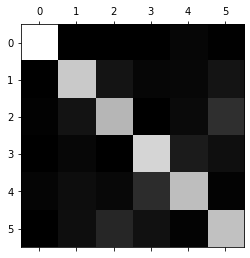

In [ ]:
plt.matshow(conf_mat, cmap=matplotlib.cm.gray)
plt.show()

This plot makes more sense that the above matrix. The rows of the figure represent the actual class and the columns represnt the predicted class.
We can see a clear white in position (0,0) while the 0th row and 0th columns are completely black. This means that our classifier recongnises this class more accurately and doenst confuse it with any other classes.
The other classes however are seemed to be confued leading inconsitent shades of gray arcoss the figure. Ideally we would have wanted a clear white diagonal for our confusion matrix.

Now let us check the performance measure on our test data.

In [ ]:
y_test_pred = sgd_clf.predict(X_test)
print("Precision: {} Recall: {}".format(precision_score(y_test, y_test_pred, average="weighted"),recall_score(y_test, y_test_pred, average="weighted")))

Precision: 0.7719848799091127 Recall: 0.7714190093708166


In [ ]:
cnf_mat = confusion_matrix(y_test, y_test_pred)
cnf_mat

array([[961,   5,   5,   1,  21,   4],
       [  4, 742,  78,  37,  32,  77],
       [ 14,  83, 675,   4,  45, 173],
       [  3,  28,   3, 809,  99,  61],
       [ 18,  39,  26, 184, 718,  19],
       [  2,  54, 157,  72,  18, 705]])

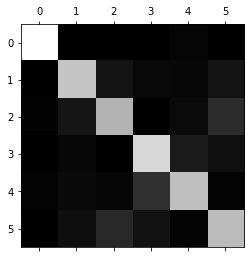

In [ ]:
plt.matshow(cnf_mat, cmap=matplotlib.cm.gray)
plt.show()

Well the classifer is producing an identical result on test dataset too. This signifies our claims that there is no overfitting of data as our algorithm is tuned well. 

Still the prefomance of the classifer is significantly low which gives rise to two new hypthesis which are contradicting eachother:

1.   The linear algorithm is underfitting the data so a sophisticated algorithm is required for our dataset.
2.  There is some problem with the features selection or feature calculation and the feature engineering process has to be repeated again with futhrer analysis.

To actually find out which of the hypothesis among these two are true further research on other classification algorithms are needed.


**Principle Component Analysis (PCA)**


Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables.
Each of the principal components is chosen in such a way so that it would describe most of the still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has maximum variance.

As our dataset has 32 set of features, visualising it requires 32 dimensions which is not possible. So, we intend to use PCA to reduce the dimension of our dataset to either two or three so that the visualisation of decision boundaries of SGDClassifier is possible. Note that the reduced fetures set has to have performance equivalent to the original feature. If the performance is low after dimensionlity reduction then the visualisation of such decision boundary has no significance.

First let us try PCA using 2 components 

In [ ]:
pca = PCA(n_components = 2) #initialising PCA for 2 componets   
X_train_p = pca.fit_transform(X_train) #transforming the training data

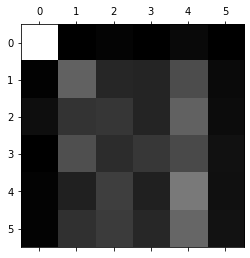

In [ ]:
#retraining the classifier and evlauating the performance
sgd_clf.fit(X_train_p,y_train)
y_train_p_pred = sgd_clf.predict(X_train_p)
conf_mat_p = confusion_matrix(y_train,y_train_p_pred)
plt.matshow(conf_mat_p, cmap=matplotlib.cm.gray)
plt.show()

In [ ]:
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_p_pred, average='weighted'),recall_score(y_train, y_train_p_pred, average='weighted')))

Precision score: 0.36626057794652306, Recall score: 0.3738075313807531


Here we can see that our classifier perfoms very poorly on this reduction. So lets try it using 3 components.

In [ ]:
pca = PCA(n_components = 3) #initialising PCA for 3 componets    
X_train_p = pca.fit_transform(X_train) #transforming the training data

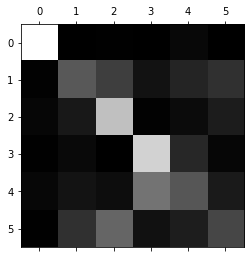

In [ ]:
#retraining the classifeir and evaluating the performance
sgd_clf.fit(X_train_p,y_train)
y_train_p_pred = sgd_clf.predict(X_train_p)
conf_mat_p = confusion_matrix(y_train,y_train_p_pred)
plt.matshow(conf_mat_p, cmap=matplotlib.cm.gray)
plt.show()

In [ ]:
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_p_pred, average='weighted'),recall_score(y_train, y_train_p_pred, average='weighted')))

Precision score: 0.5459789787169144, Recall score: 0.5652719665271967


We can see that even using 3 components we do not get any better results. So, this infact means that the visualisation of decision boundary for our classifer is not possible.

Below we perform PCA using 8 and 16 components and evalute their results.

In [ ]:
pca = PCA(n_components = 8) #initialising PCA for 8 componets   
X_train_p = pca.fit_transform(X_train) #transforming the training data

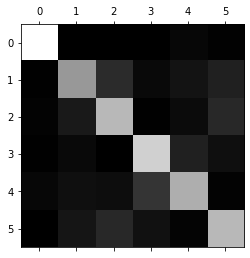

In [ ]:
#retraining the classifeir and evaluating the performance
sgd_clf.fit(X_train_p,y_train)
y_train_p_pred = sgd_clf.predict(X_train_p)
conf_mat_p = confusion_matrix(y_train,y_train_p_pred)
plt.matshow(conf_mat_p, cmap=matplotlib.cm.gray)
plt.show()

In [ ]:
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_p_pred, average='weighted'),recall_score(y_train, y_train_p_pred, average='weighted')))

Precision score: 0.7235389675708143, Recall score: 0.7239330543933055


In [ ]:
pca = PCA(n_components = 16) #initialising PCA for 16 componets   
X_train_p = pca.fit_transform(X_train) #transforming the training data

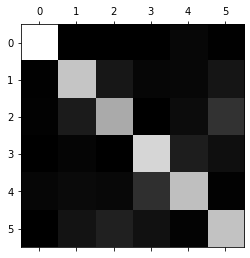

In [ ]:
#retraining the classifeir and evaluating the performance
sgd_clf.fit(X_train_p,y_train)
y_train_p_pred = sgd_clf.predict(X_train_p)
conf_mat_p = confusion_matrix(y_train,y_train_p_pred)
plt.matshow(conf_mat_p, cmap=matplotlib.cm.gray)
plt.show()

In [ ]:
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_p_pred, average='weighted'),recall_score(y_train, y_train_p_pred, average='weighted')))

Precision score: 0.7644696214414359, Recall score: 0.7644351464435146


We can see that using 16 components produces result that is equivalent to our original result with a small offset. If we could have obtained such results using 2 or 3 components the visualisation would have been possible for us.
Furthermore this analysis also signifies that all the features are more relevant in their original dimension (32).

Hence, we have completed our study on linear classifers using SGDClassifier. Next we are planning to use Decission Tree algorithm on our features set and evaluate its perfromance to make conclusions on the hypothesis made earlier.